# Extract Data from Mysql

In [1]:
#!pip install pymysql
#!pip install mysql-connector
#!pip install mysql-connector-python

In [2]:
#!pip install ipython-sql

In [3]:
import os
import mysql.connector
import pandas as pd
import numpy as np

In [4]:
## making connections to database server
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team3',
                                  password='DM!$!Team!27@9!20&')

In [5]:
## Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_telecom',)


In [6]:
## connecting the database
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team3',
                                  password='DM!$!Team!27@9!20&',
                                  database='project_telecom')

In [7]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

/var/folders/2x/bvptsh3d6974nz8w90r0jggw0000gn/T/ipykernel_5635/3349514694.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db_tables=pd.read_sql_query('show tables',connection)


  Tables_in_project_telecom
0        telecom_churn_data


In [8]:
query = "select * from telecom_churn_data" 
output = pd.read_sql(query,connection)
print(output.shape)
output

/var/folders/2x/bvptsh3d6974nz8w90r0jggw0000gn/T/ipykernel_5635/365384891.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  output = pd.read_sql(query,connection)


(4617, 21)


,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [9]:
# Renaming Columns
output.columns.values[0:21] =["State", "Account Length","Area Code","Phone","International Plan",
                              "VMail Plan","VMail Message","Day Mins","Day Calls","Day Charge",
                              "Eve Mins","Eve Calls","Eve Charge","Night Mins","Night Calls","Night Charge",
                              "International Mins","International calls","International Charge",
                              "CustServ Calls","Churn"]
output

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [10]:
# Saving database tables in the system
output.to_csv('Telecom_Churn.csv')

# Domain Analysis

State: Explore the geographical distribution of customers. Analyze whether churn rates vary significantly by state.

Account Length: Investigate whether customers with longer account lengths are less likely to churn.

Area Code: Determine if area codes have any impact on churn rates, potentially indicating regional differences.

International Plan: Assess how having an international plan affects churn. Analyze whether customers with international plans are more or less likely to churn.

VMail Plan: Explore the impact of having a voicemail plan on churn rates.

VMail Message: Investigate if the number of voicemail messages affects churn.

Day Mins, Day Calls, Day Charge: Analyze daytime usage patterns and their correlation with churn.

Eve Mins, Eve Calls, Eve Charge: Investigate evening usage patterns and their relationship with churn.

Night Mins, Night Calls, Night Charge: Explore nighttime usage and its connection to churn.

International Mins, International Calls, International Charge: Analyze international usage and its impact on churn.

CustServ Calls: Investigate the relationship between the number of customer service calls and churn.

# Importing Libraries and loading data

In [11]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Loading Data
data = pd.read_csv('Telecom_Churn.csv',skipinitialspace=True)

In [13]:
data

,Unnamed: 0,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,4612,NY,57,510,345-7512,no,yes,25,144.0,81,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,4613,NM,177,408,343-6820,no,yes,29,189.0,91,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,4614,VT,67,408,338-4794,no,yes,33,127.5,126,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,4615,MI,98,415,355-8388,no,yes,23,168.9,98,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


# Data Modifications

In [14]:
# Removing Unwanted Column 
data.drop(['Unnamed: 0'],axis= 1,inplace= True)

In [15]:
data

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [16]:
data['International Plan'] = data['International Plan'].map({'yes':1,'no':0})

In [17]:
data['VMail Plan'] = data['VMail Plan'].map({'yes':1,'no':0})

In [18]:
data['Churn'].unique()

array(['False.', 'True.'], dtype=object)

In [19]:
data['Churn'] = data['Churn'].map({'True.':1,'False.':0})

In [20]:
data

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,0,1,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,0
4613,NM,177,408,343-6820,0,1,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,0
4614,VT,67,408,338-4794,0,1,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,0
4615,MI,98,415,355-8388,0,1,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,0


In [21]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [22]:
# Creating new columns with No international calls,mins,charge
data['T_nointer_calls'] = data['Day Calls'] + data['Eve Calls'] + data['Night Calls']
data['T_nointer_mins'] = data['Day Mins'] + data['Eve Mins'] + data['Night Mins']
data['T_nointer_charge'] = data['Day Charge'] + data['Eve Charge'] + data['Night Charge']

In [23]:
# Creating new columns with total calls,mins,charge
data['Total_calls'] = data['Day Calls'] + data['Eve Calls'] + data['Night Calls'] + data['International calls']
data['Total_mins'] = data['Day Mins'] + data['Eve Mins'] + data['Night Mins'] + data['International Mins']
data['Total_charge'] = data['Day Charge'] + data['Eve Charge'] + data['Night Charge'] + data['International Charge']

In [24]:
# Cost per minute for non international calls
total_cost = data['T_nointer_charge'].sum()
total_duration_minutes = data["T_nointer_mins"].sum()
cost_per_minute = total_cost / total_duration_minutes
print('Cost for non international call per minute is: $',format(cost_per_minute,".2f"))

Cost for non international call per minute is: $ 0.10


In [25]:
data

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,International calls,International Charge,CustServ Calls,Churn,T_nointer_calls,T_nointer_mins,T_nointer_charge,Total_calls,Total_mins,Total_charge
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,3,2.70,1,0,300,707.2,72.86,303,717.2,75.56
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,3,3.70,1,0,329,611.5,55.54,332,625.2,59.24
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,5,3.29,0,0,328,527.2,59.00,333,539.4,62.29
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,7,1.78,2,0,248,558.2,65.02,255,564.8,66.80
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,3,2.73,3,0,356,501.9,49.36,359,512.0,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,0,1,25,144.0,81,24.48,...,6,2.30,3,0,315,489.8,47.53,321,498.3,49.83
4613,NM,177,408,343-6820,0,1,29,189.0,91,32.13,...,1,4.24,3,0,303,655.7,65.25,304,671.4,69.49
4614,VT,67,408,338-4794,0,1,33,127.5,126,21.68,...,3,3.51,1,0,346,624.5,55.89,349,637.5,59.40
4615,MI,98,415,355-8388,0,1,23,168.9,98,28.71,...,3,3.86,0,0,311,560.7,55.40,314,575.0,59.26


In [26]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
print("Categorical columns: ",categorical_columns)
print("Numerical columns: ",numerical_columns)

Categorical columns:  Index(['State', 'Phone'], dtype='object')
Numerical columns:  Index(['Account Length', 'Area Code', 'International Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'International Mins', 'International calls', 'International Charge',
       'CustServ Calls', 'Churn', 'T_nointer_calls', 'T_nointer_mins',
       'T_nointer_charge', 'Total_calls', 'Total_mins', 'Total_charge'],
      dtype='object')


In [27]:
data['State'] = data['State'].astype('category')
data['State_Code'] = data['State'].cat.codes

In [28]:
data['State_Code']

0       16
1       35
2       31
3       35
4       36
        ..
4612    34
4613    32
4614    46
4615    22
4616    15
Name: State_Code, Length: 4617, dtype: int8

In [29]:
unique_states = data[['State', 'State_Code']].drop_duplicates()
state_code_to_state = dict(zip(unique_states['State_Code'], unique_states['State']))
state_code_to_state

{16: 'KS',
 35: 'OH',
 31: 'NJ',
 36: 'OK',
 1: 'AL',
 19: 'MA',
 24: 'MO',
 18: 'LA',
 49: 'WV',
 15: 'IN',
 39: 'RI',
 12: 'IA',
 26: 'MT',
 34: 'NY',
 13: 'ID',
 46: 'VT',
 45: 'VA',
 43: 'TX',
 9: 'FL',
 5: 'CO',
 3: 'AZ',
 40: 'SC',
 29: 'NE',
 50: 'WY',
 11: 'HI',
 14: 'IL',
 30: 'NH',
 10: 'GA',
 0: 'AK',
 20: 'MD',
 2: 'AR',
 48: 'WI',
 37: 'OR',
 22: 'MI',
 8: 'DE',
 44: 'UT',
 4: 'CA',
 23: 'MN',
 41: 'SD',
 27: 'NC',
 47: 'WA',
 32: 'NM',
 33: 'NV',
 7: 'DC',
 17: 'KY',
 21: 'ME',
 25: 'MS',
 42: 'TN',
 38: 'PA',
 6: 'CT',
 28: 'ND'}

In [30]:
data = data.drop(columns=['State'])

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [32]:
data.head()

,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,International Charge,CustServ Calls,Churn,T_nointer_calls,T_nointer_mins,T_nointer_charge,Total_calls,Total_mins,Total_charge,State_Code
0,0.524793,0.068627,382-4657,0.0,1.0,0.490196,0.754196,0.666667,0.754183,0.542755,...,0.500000,0.111111,0.0,0.504505,0.717966,0.728575,0.497778,0.720659,0.718793,16
1,0.438017,0.068627,371-7191,0.0,1.0,0.509804,0.459744,0.745455,0.459672,0.537531,...,0.685185,0.111111,0.0,0.635135,0.558916,0.489942,0.626667,0.567505,0.495903,35
2,0.561983,0.068627,358-1921,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,...,0.609259,0.000000,0.0,0.630631,0.418813,0.537614,0.631111,0.424671,0.537558,31
3,0.342975,0.000000,375-9999,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,...,0.329630,0.222222,0.0,0.270270,0.470334,0.620557,0.284444,0.466955,0.599153,35
4,0.305785,0.068627,330-6626,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,...,0.505556,0.333333,0.0,0.756757,0.376766,0.404795,0.746667,0.379058,0.398252,36


In [33]:
data = data.drop(columns=['Phone'])

# Data Visualization

<Axes: xlabel='Total_charge'>

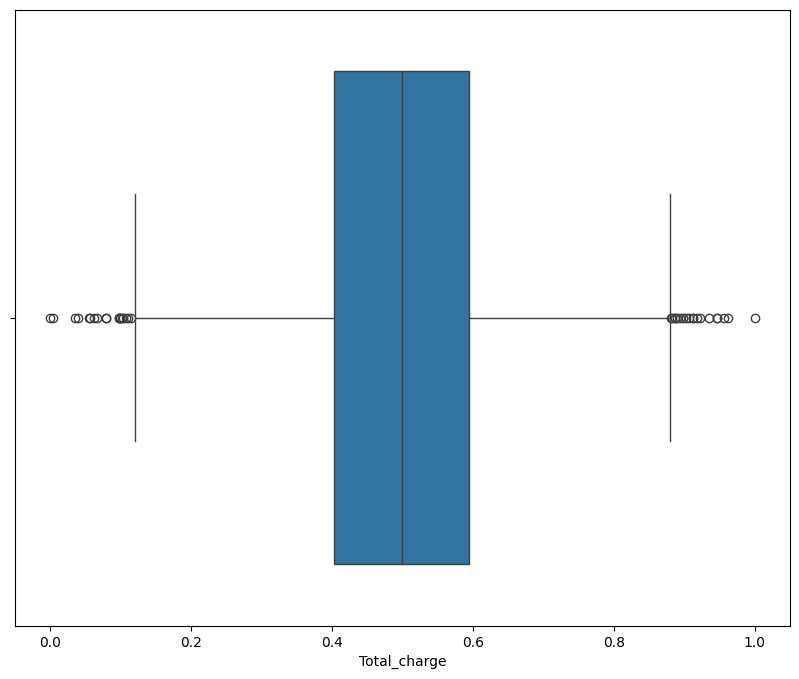

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(x=data.Total_charge,data=data)

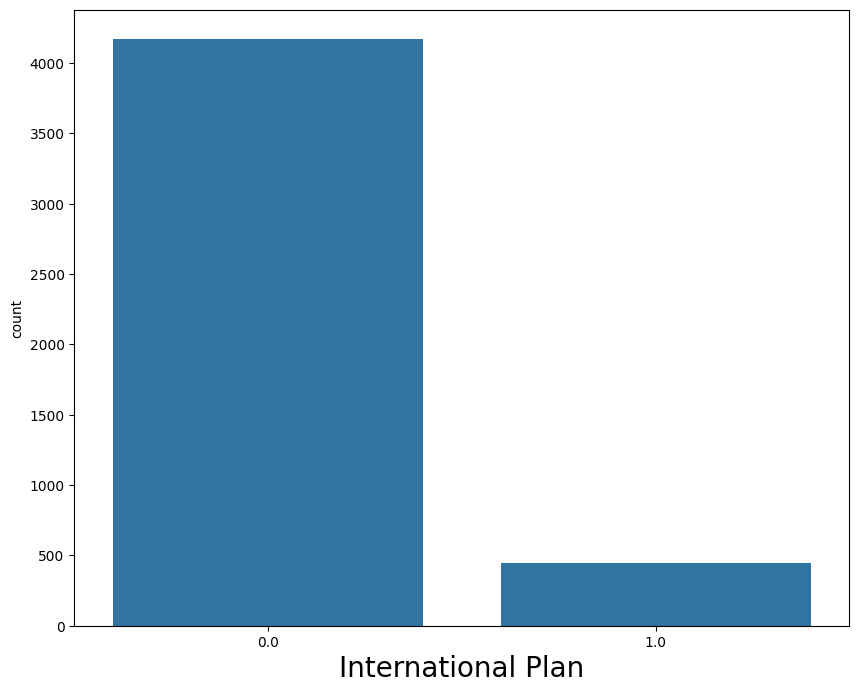

In [39]:
plt.figure(figsize=(10,8))  
sns.countplot(x='International Plan',data=data)
plt.xlabel('International Plan',fontsize=20)
plt.show()

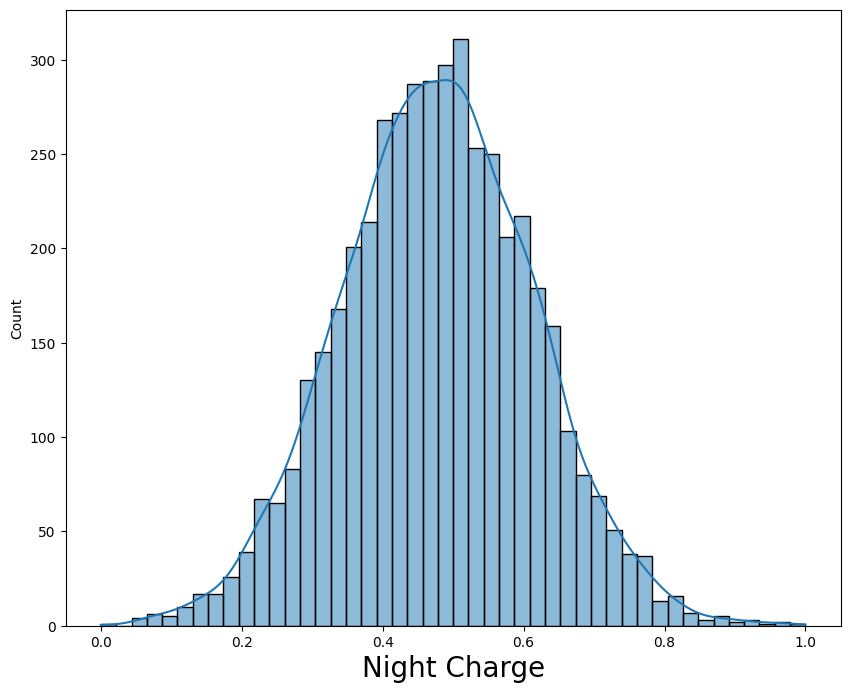

In [40]:
plt.figure(figsize=(10,8))  
sns.histplot(x='Night Charge',data=data,kde=True)
plt.xlabel('Night Charge',fontsize=20)
plt.show()

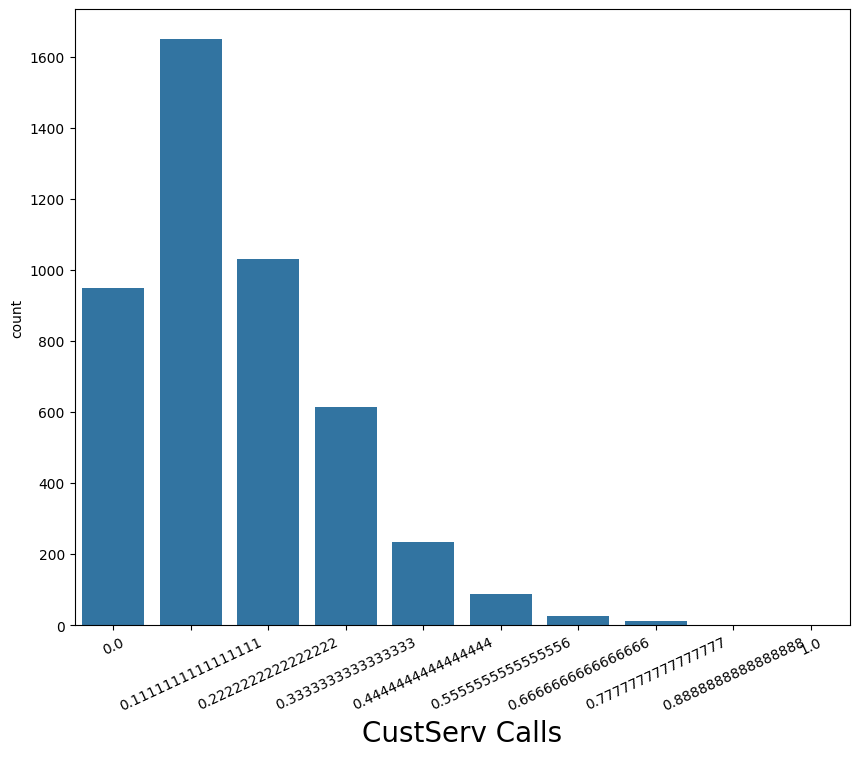

In [41]:
plt.figure(figsize=(10,8))  
sns.countplot(x='CustServ Calls',data=data)
plt.xlabel('CustServ Calls',fontsize=20)
plt.xticks(rotation = 25)
plt.show()

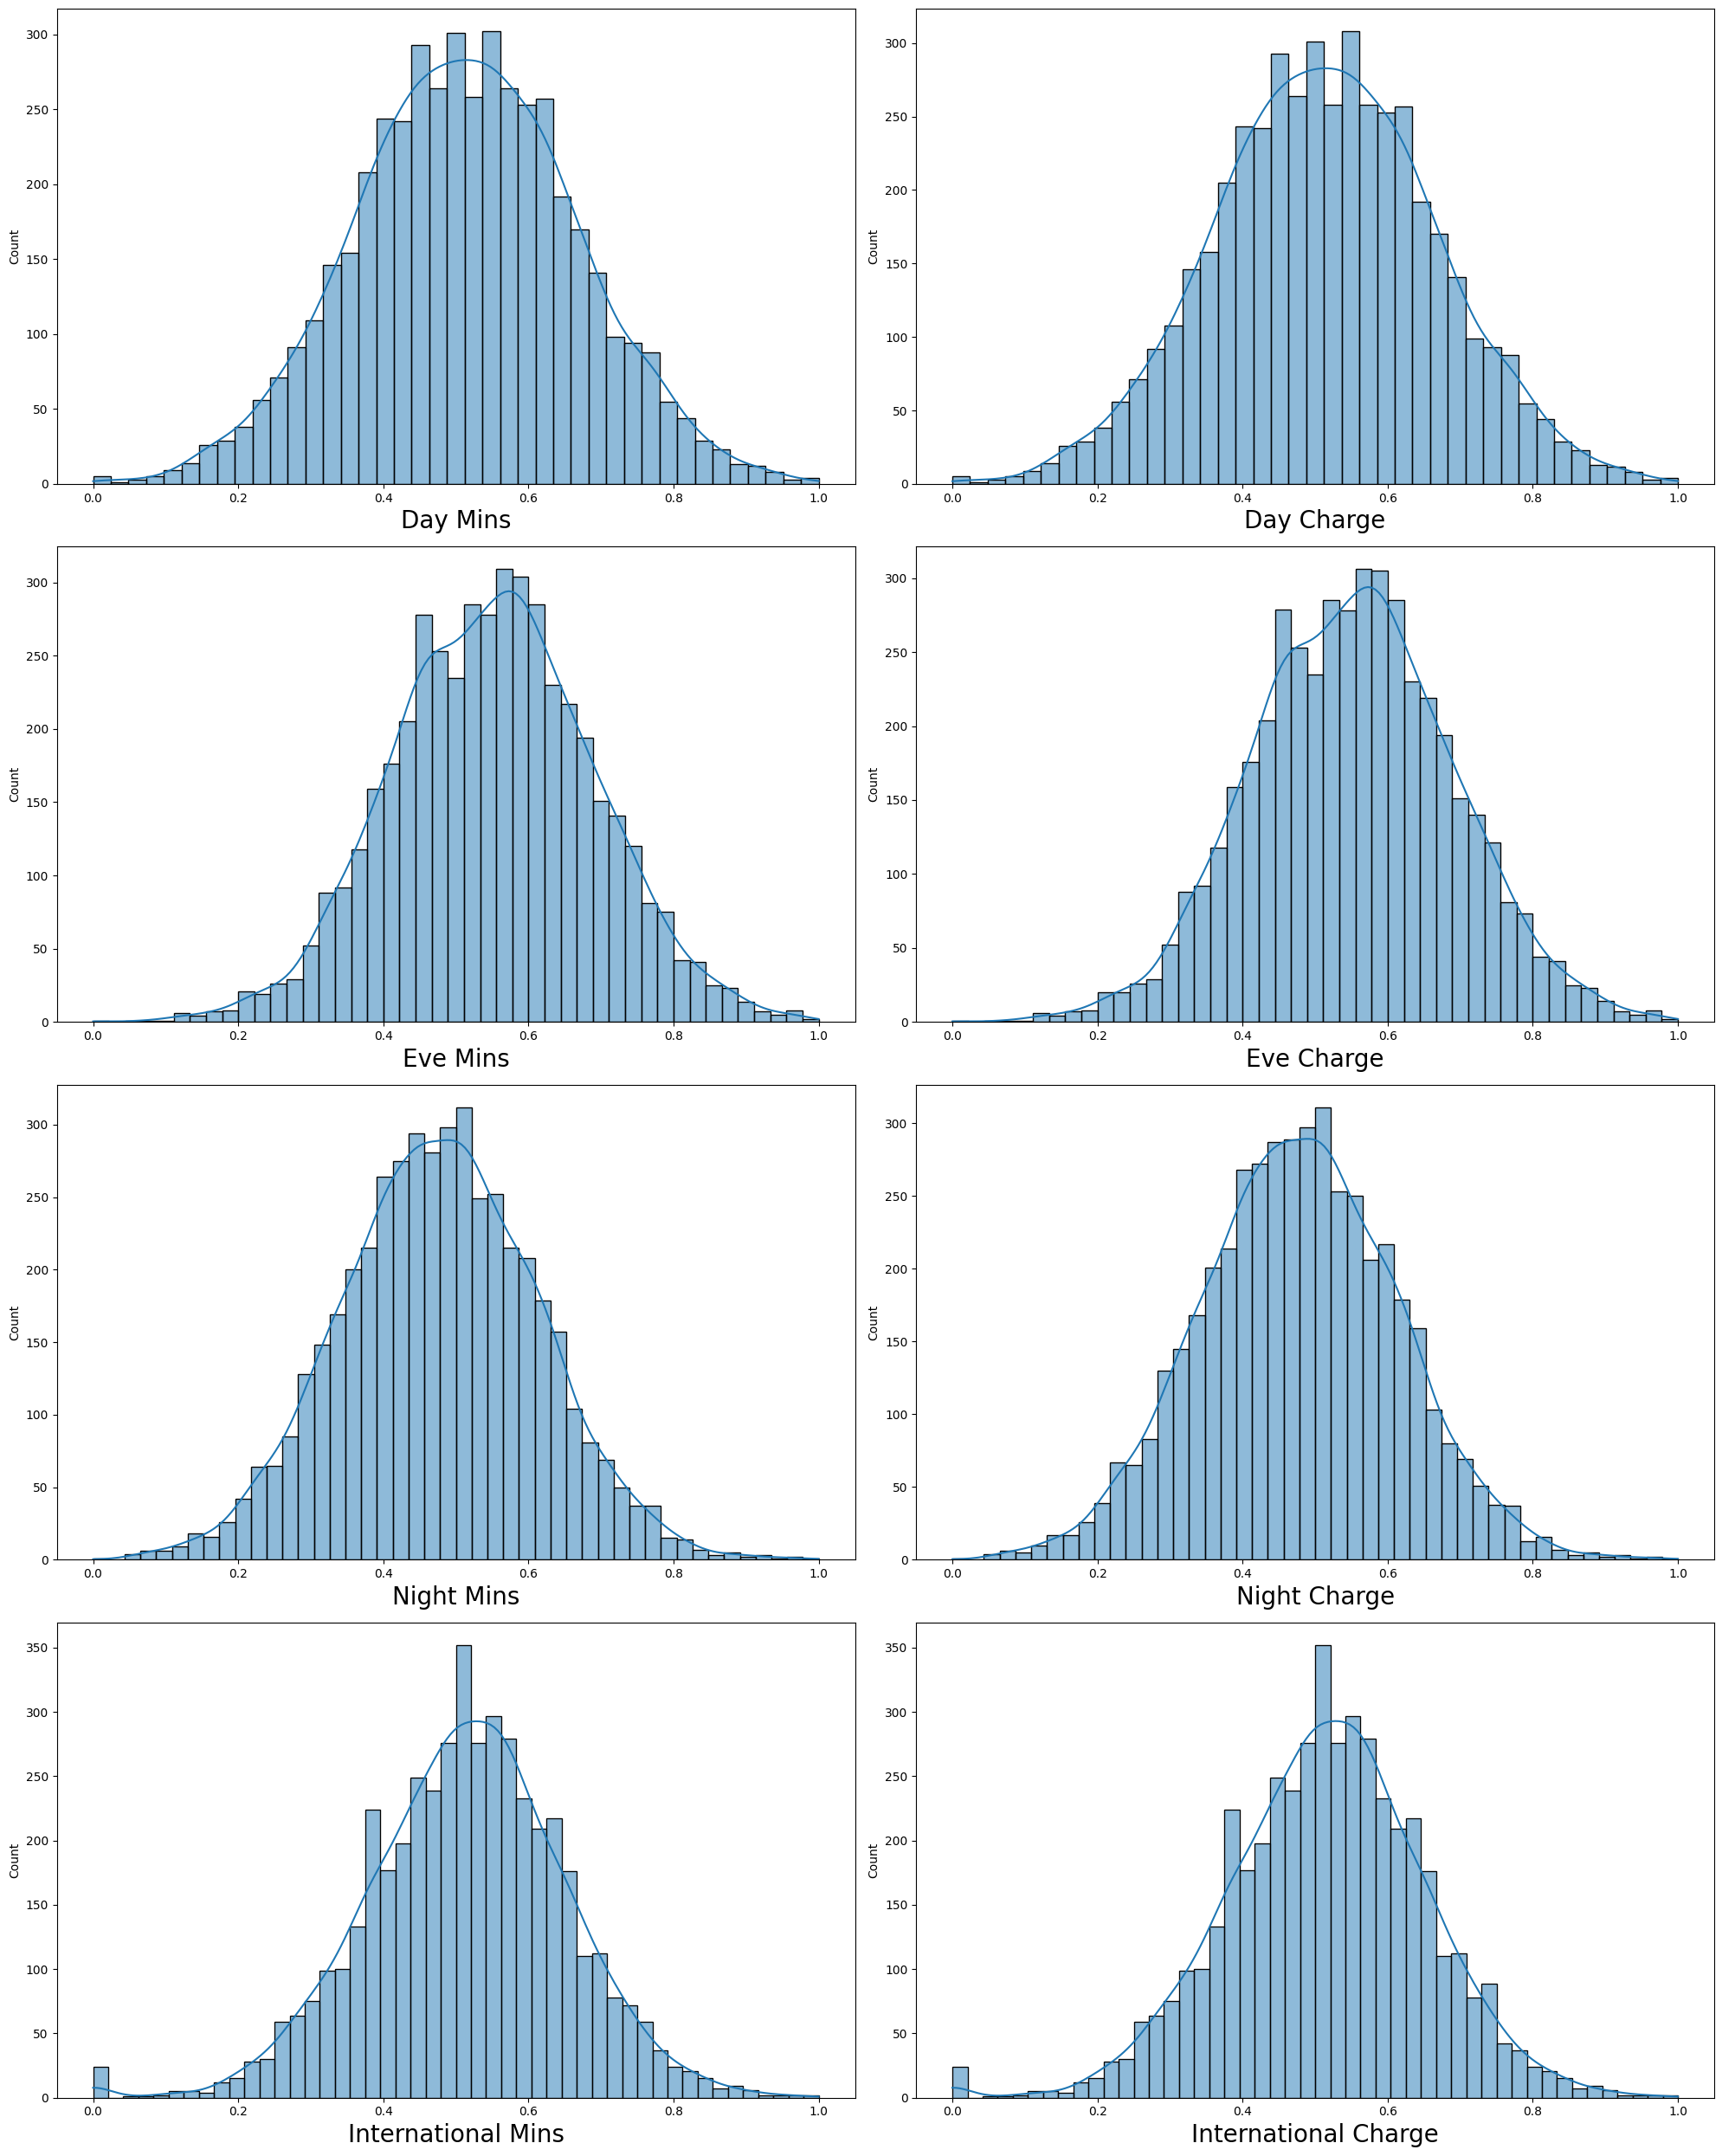

In [42]:
cols=data[['Day Mins', 'Day Charge', 'Eve Mins', 'Eve Charge', 'Night Mins',
       'Night Charge', 'International Mins', 'International Charge']]

plotno=1
plt.figure(figsize=(20,25))

for column in cols:
    if plotno<=8:   
        plt.subplot(4,2,plotno)
        sns.histplot(x=cols[column],kde=True) 
        plt.xlabel(column,fontsize=20) 
    plotno+=1
plt.tight_layout()
plt.show()

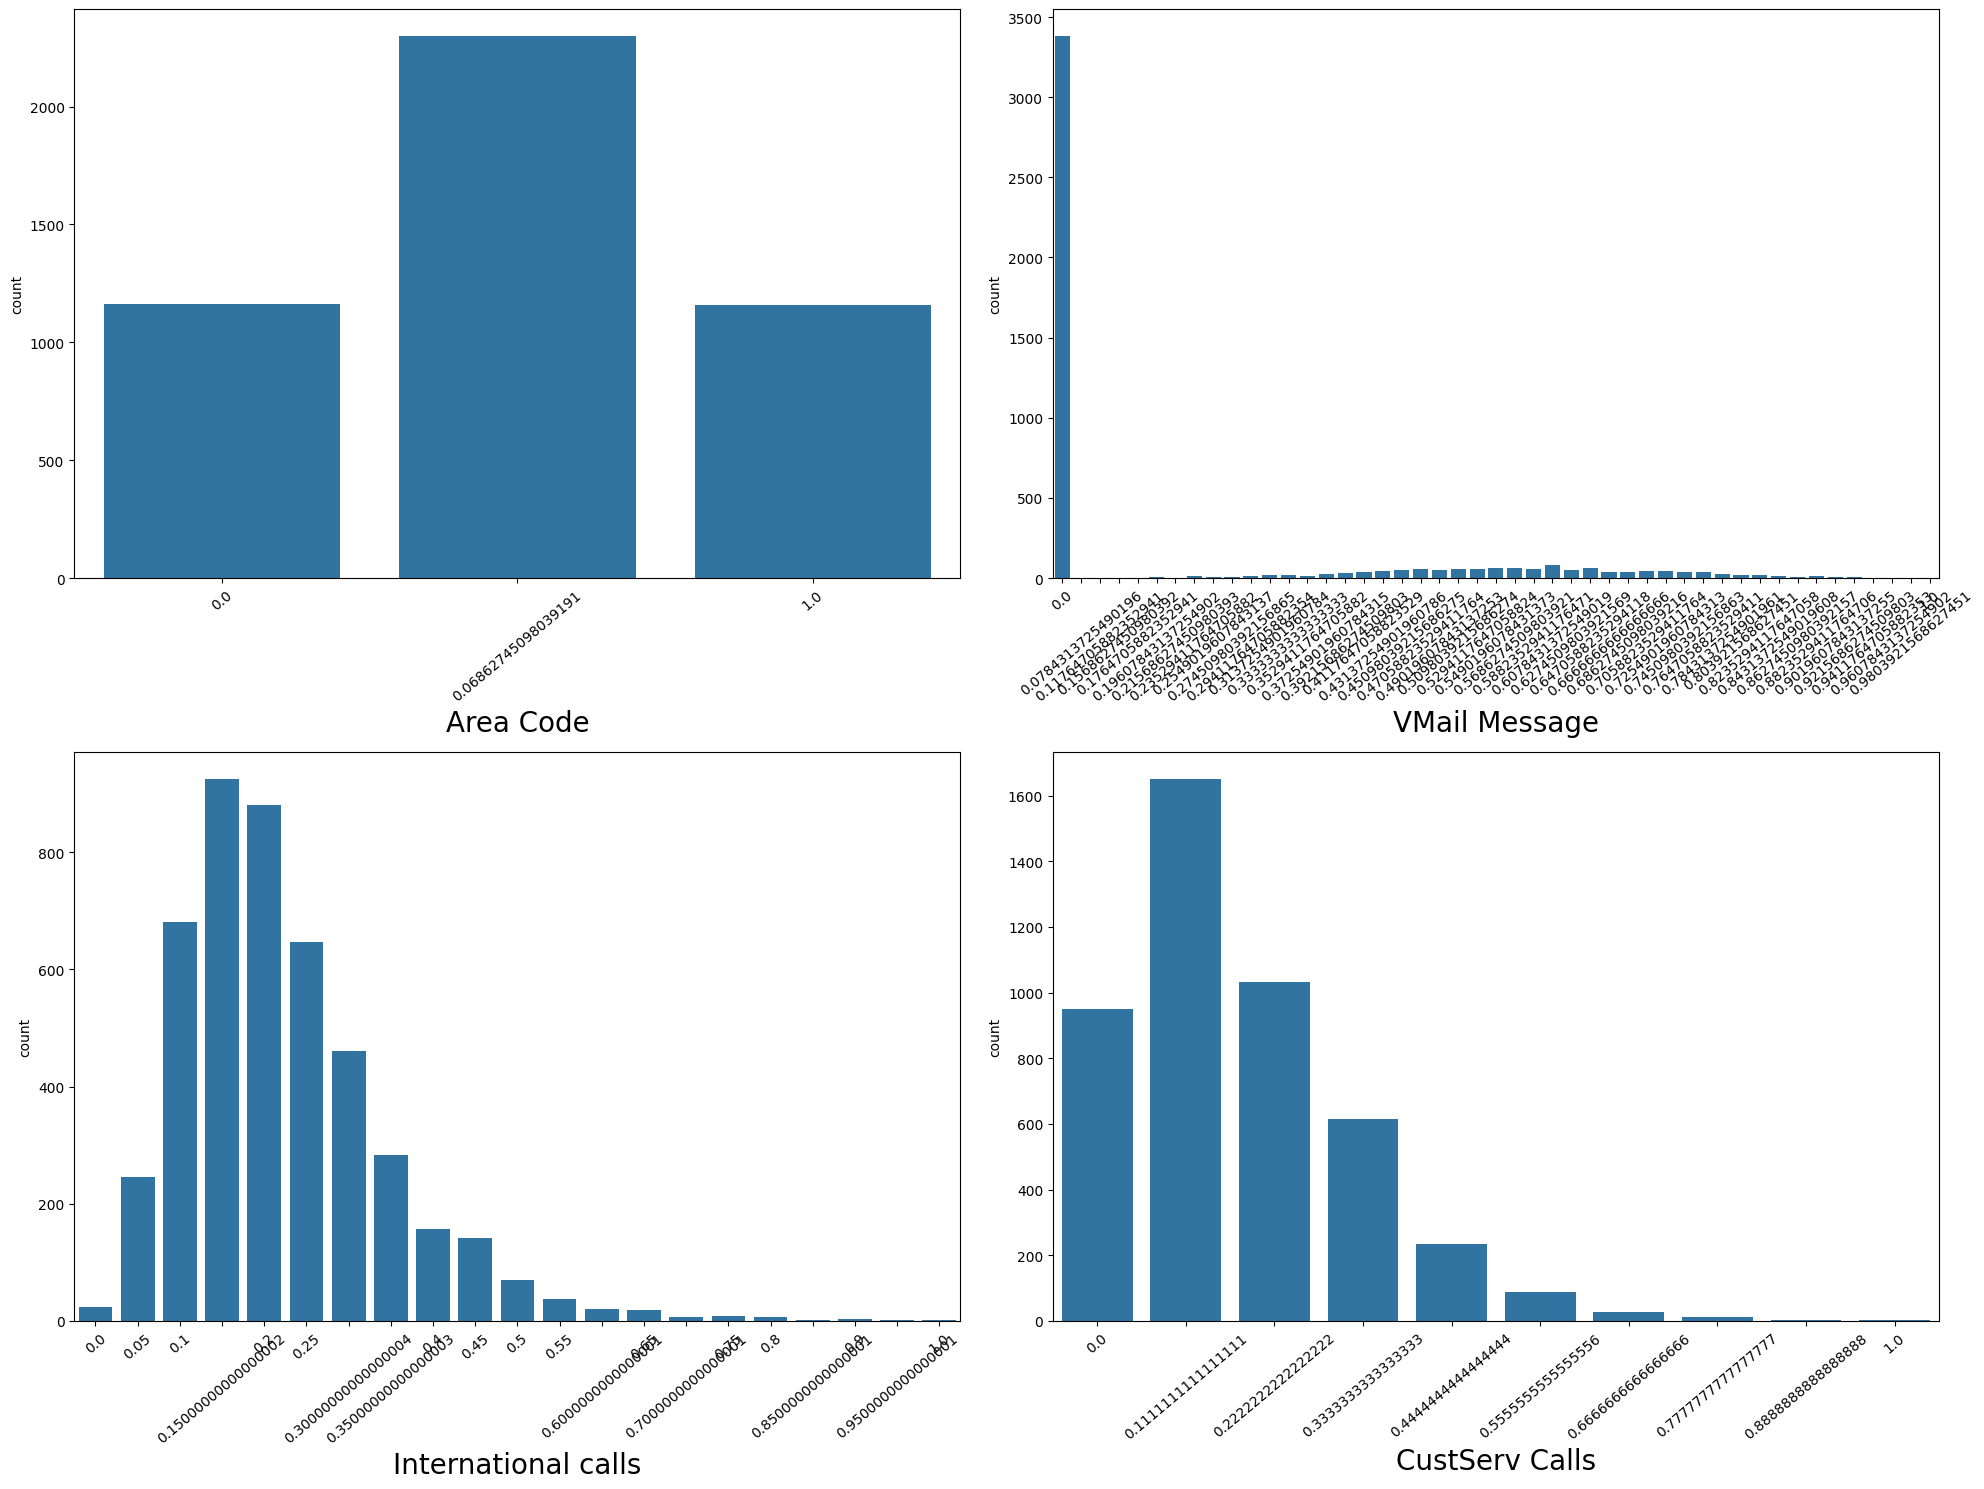

In [43]:
cols=data[[ 'Area Code', 'VMail Message', 'International calls', 'CustServ Calls']]

plotno=1
plt.figure(figsize=(20,15))

for column in cols:
    if plotno<=4:   
        plt.subplot(2,2,plotno)
        sns.countplot(x=cols[column]) 
        plt.xlabel(column,fontsize=20) 
        plt.xticks(rotation = 40)
    plotno+=1
plt.tight_layout()
plt.show()

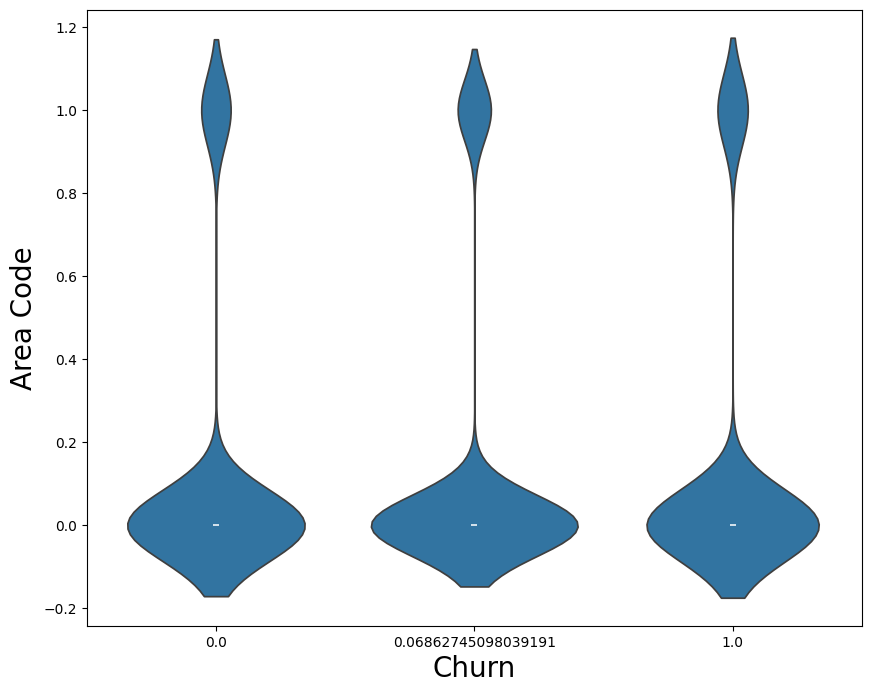

In [44]:
plt.figure(figsize=(10,8))  
sns.violinplot(x='Area Code',y='Churn',data=data)
plt.xlabel('Churn',fontsize=20)
plt.ylabel('Area Code',fontsize=20)
plt.show()

In [45]:
grouped=data.groupby(['Churn','International Plan']).size().unstack()
grouped

International Plan,0.0,1.0
Churn,,
0.0,3701,260
1.0,470,186


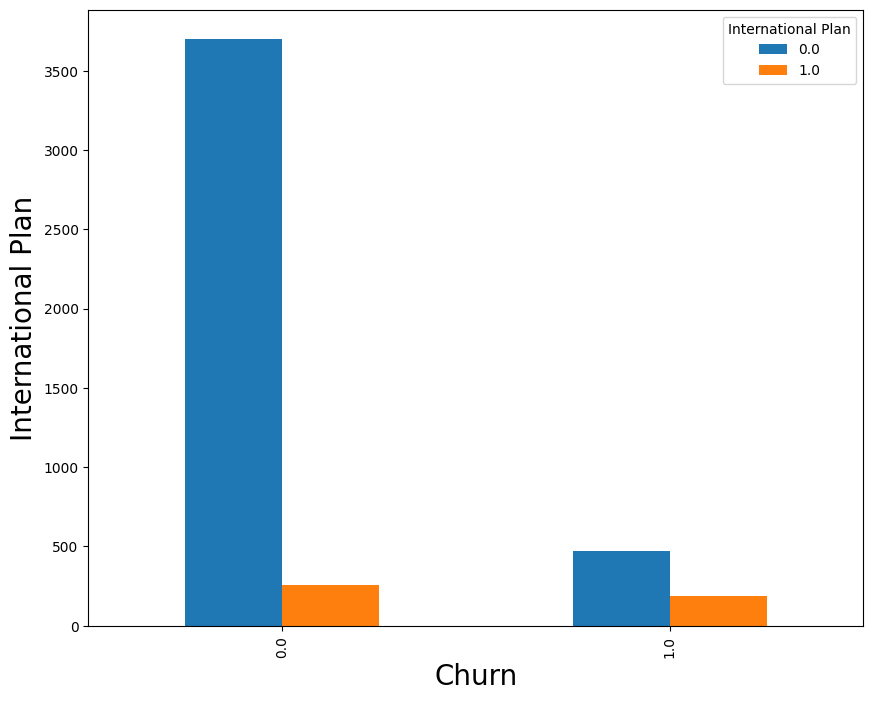

In [46]:
grouped.plot(kind='bar',figsize=(10,8))
plt.xlabel('Churn',fontsize=20)
plt.ylabel('International Plan',fontsize=20)
plt.show()

In [47]:
grouped=data.groupby(['Churn','VMail Plan']).size().unstack()
grouped

VMail Plan,0.0,1.0
Churn,,
0.0,2822,1139
1.0,559,97


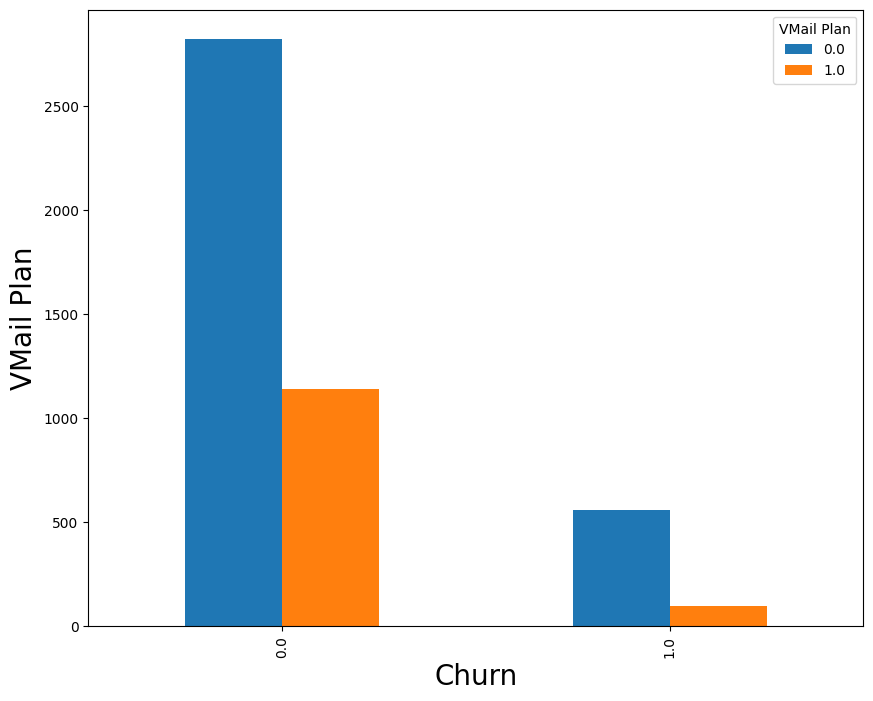

In [48]:
grouped.plot(kind='bar',figsize=(10,8))
plt.xlabel('Churn',fontsize=20)
plt.ylabel('VMail Plan',fontsize=20)
plt.show()

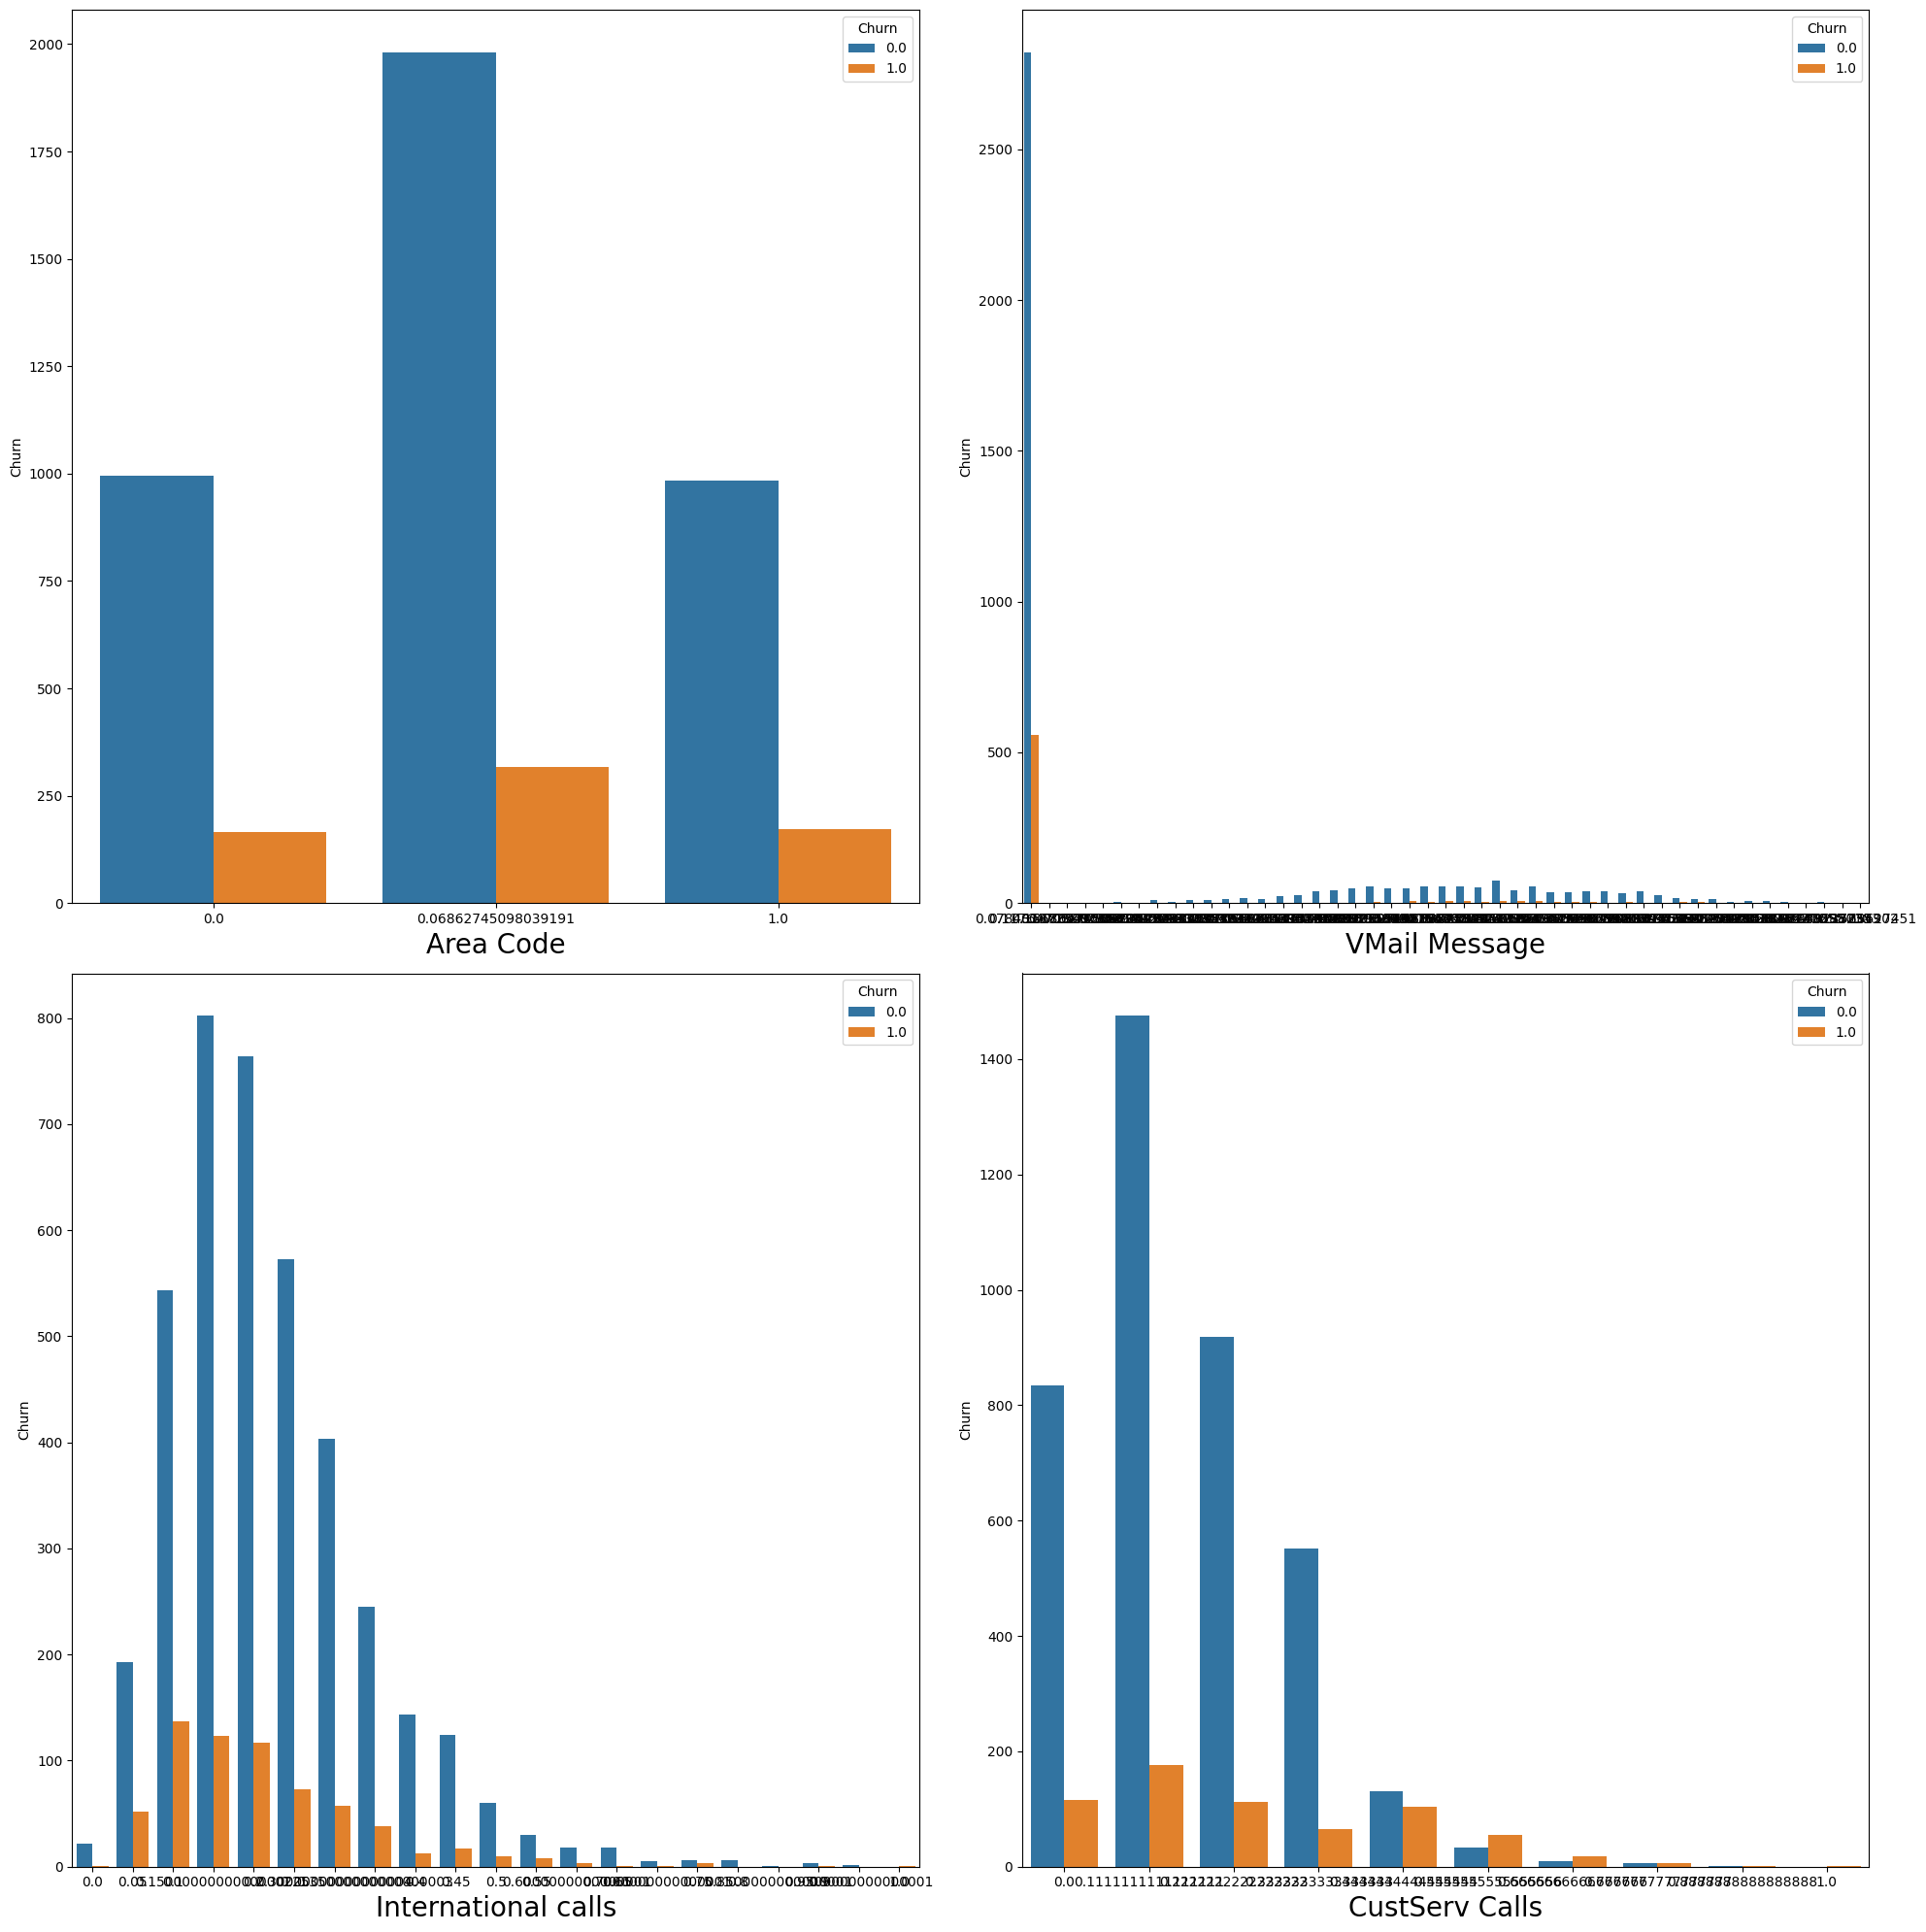

In [49]:
cols=data[['Area Code', 'VMail Message', 'International calls', 'CustServ Calls']]

plotno=1
plt.figure(figsize=(20,20))

for column in cols:
    if plotno<=8:   
        plt.subplot(2,2,plotno)
        sns.countplot(x=cols[column],hue=data.Churn) 
        plt.xlabel(column,fontsize=20) 
        plt.ylabel('Churn')
    plotno+=1
plt.tight_layout()
plt.show()


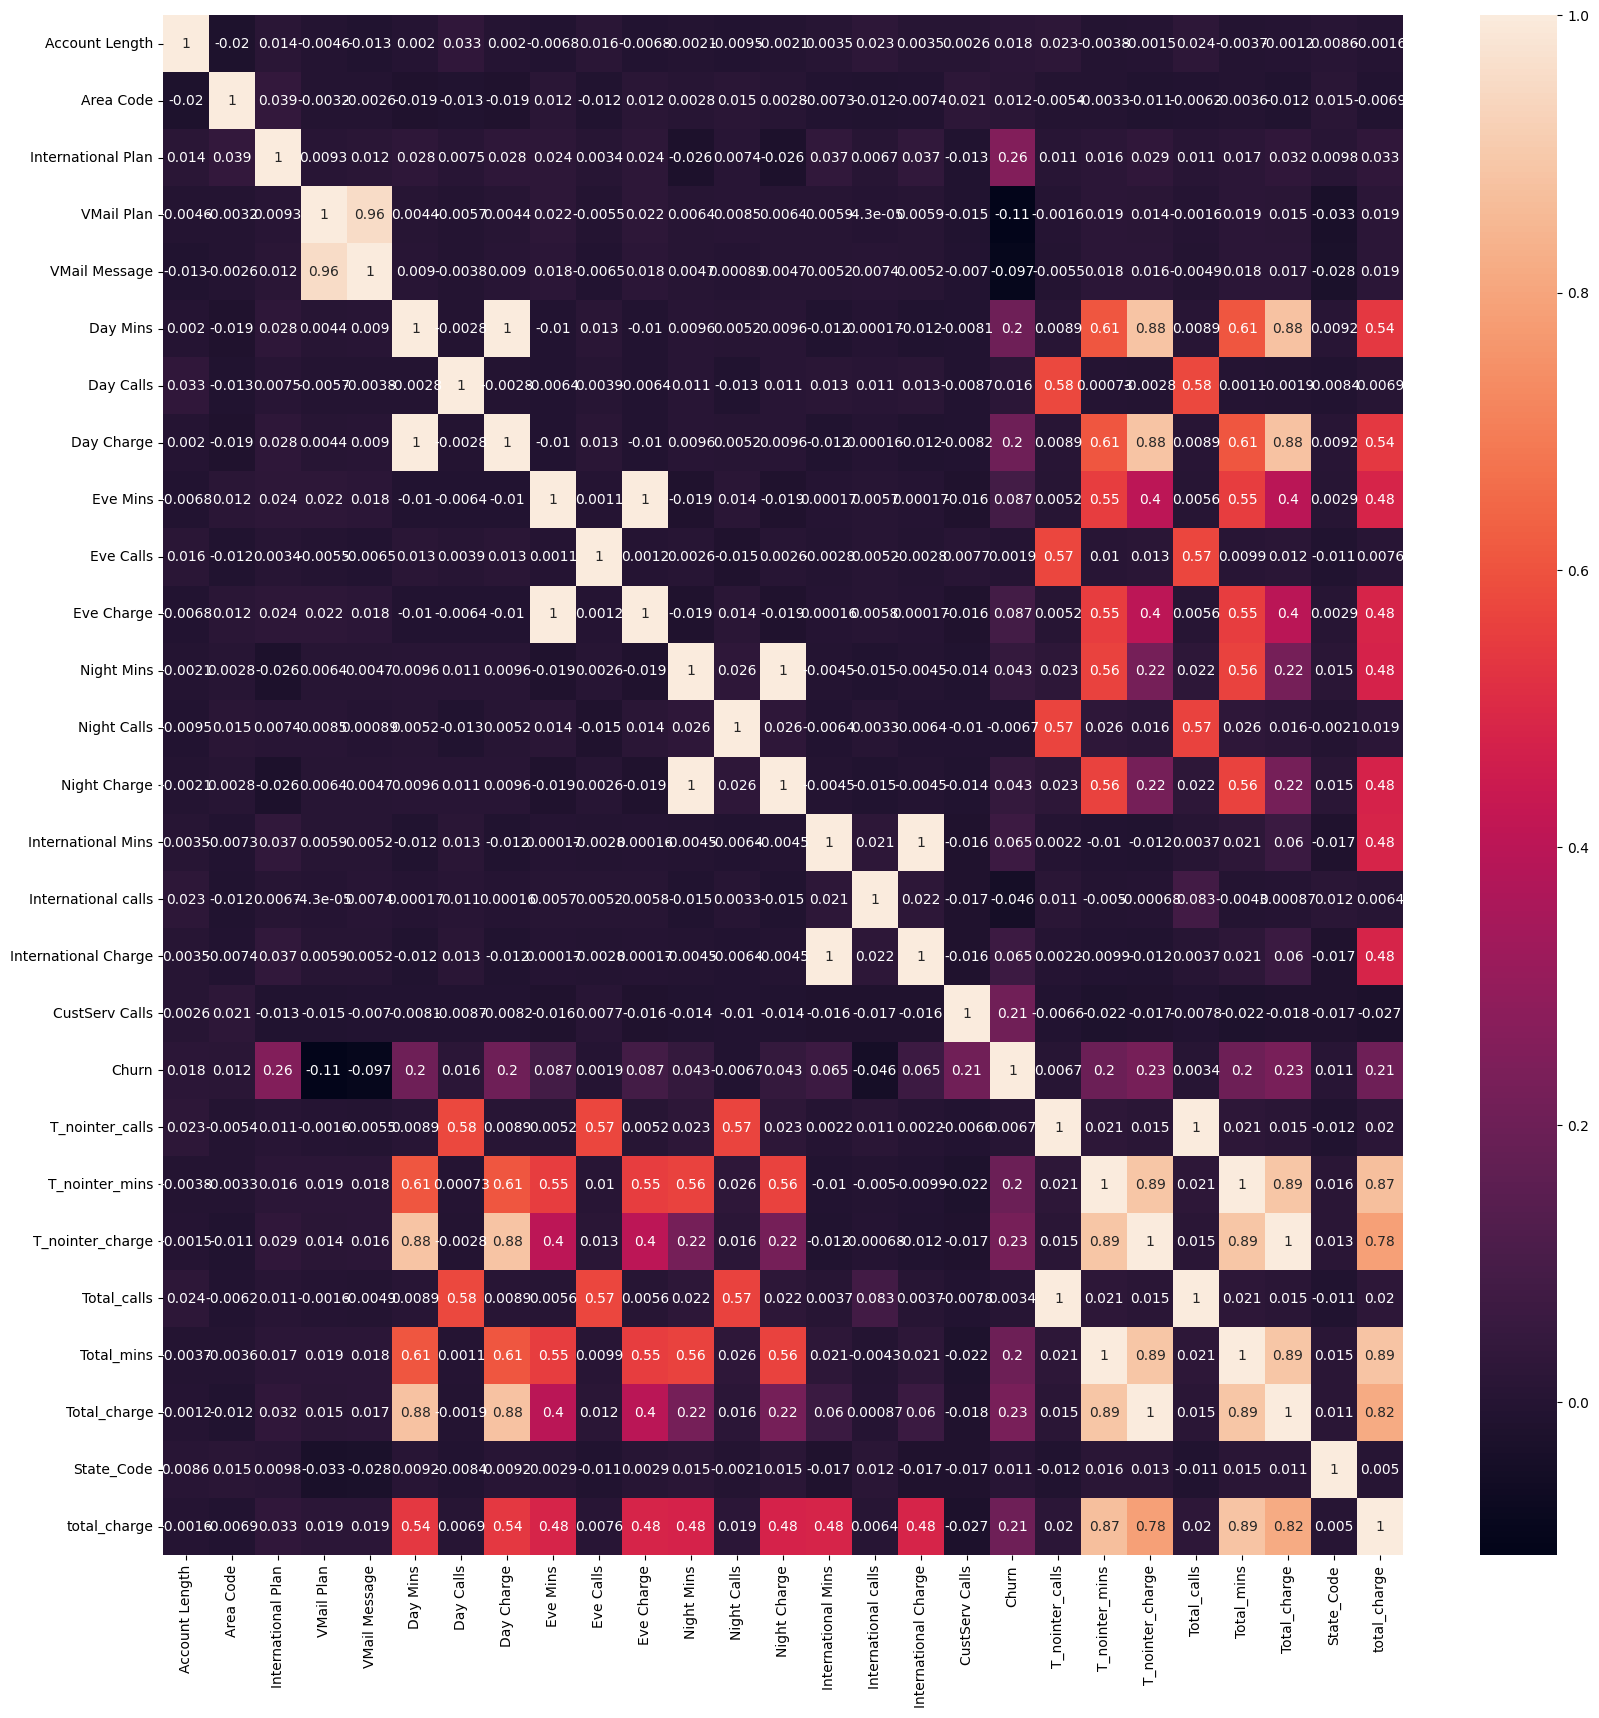

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Insights

Maximum no of customers have not purchased the international plan.

The maximum no of customer calls the company provides is 1 than 2 or no customer calls.

Found reltionship between the total charge and churn rate.

# Data Modelling

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
# Extract features and target variable for the training dataset
X_train = data.drop('Churn', axis=1)  # Features for training
y_train = data['Churn']  # Target variable for training

# Extract features and target variable for the test dataset
X_test = data.drop('Churn', axis=1)  # Features for testing
y_test = data['Churn']  # Target variable for testing

# Create a Logistic Regression model
model = LogisticRegression(random_state=42,max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.8657136668832576
Confusion Matrix:
 [[3875   86]
 [ 534  122]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      3961
         1.0       0.59      0.19      0.28       656

    accuracy                           0.87      4617
   macro avg       0.73      0.58      0.60      4617
weighted avg       0.84      0.87      0.83      4617



In [54]:
from sklearn import svm

In [55]:
# Create a Logistic Regression model
model = svm.SVC(random_state=42,max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.8579163959280919
Confusion Matrix:
 [[3961    0]
 [ 656    0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      3961
         1.0       0.00      0.00      0.00       656

    accuracy                           0.86      4617
   macro avg       0.43      0.50      0.46      4617
weighted avg       0.74      0.86      0.79      4617



## Model Comparison Report

**Model Comparison Report: Logistic Regression vs. Support Vector Machine (SVM)**

1. **Introduction:**
   - The purpose of this report is to compare the performance of two machine learning models, Logistic Regression and Support Vector Machine (SVM), based on their accuracy metrics.

2. **Accuracy Comparison:**
   - Logistic Regression achieved an accuracy of 87%.
   - SVM demonstrated a slightly lower accuracy of 86%.

3. **Interpretation:**
   - The marginal difference in accuracy suggests that both models perform comparably on the given dataset.
   - The choice between the two models may depend on factors beyond accuracy, such as interpretability, computational efficiency, and ease of implementation.

4. **Computational Efficiency:**
   - Logistic Regression is generally computationally less intensive compared to SVM, which may be a crucial consideration for large datasets.
   - SVM, especially with complex kernels, may demand more computational resources.

5. **Interpretability:**
   - Logistic Regression provides a more straightforward interpretation of feature weights, making it easier to understand the impact of individual features on the outcome.
   - SVM, particularly with non-linear kernels, might produce more complex decision boundaries, making it harder to interpret the importance of individual features.

6. **Robustness to Outliers:**
   - SVM tends to be less sensitive to outliers due to the nature of its margin-based loss function.
   - Logistic Regression might be more influenced by outliers, as it minimizes the logistic loss function.

7. **Scalability:**
   - Logistic Regression is often more scalable to large datasets and can handle high-dimensional data efficiently.
   - SVM's training time may increase significantly with larger datasets, especially when using complex kernels.

8. **Conclusion:**
   - Both Logistic Regression and SVM demonstrate competitive performance, with Logistic Regression slightly edging out in terms of accuracy.
   - Consider the specific requirements of the problem at hand, including interpretability, computational resources, and robustness to outliers, when choosing between the two models.



## Report on challenges faced

Challenges faced during a telecom churn project using machine learning include:

Data Quality and Preprocessing: <br>
Cleaning and integrating complex data.<br>

Imbalanced Data:<br>
Dealing with the skewed proportion of churned and non-churned customers.<br>

Interpretability: <br>
Explaining model predictions.<br>

Feature Selection: <br>
Choosing relevant features from a wide range of variables.<br>

Model Overfitting: <br>
Avoiding overly complex models that perform poorly on new data.<br>